In [15]:
import tensorflow as tf

# List physical GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"Memory growth set for {len(gpus)} GPU(s).")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print("No GPUs found.")

Memory growth set for 1 GPU(s).


In [16]:
import keras
from keras import Input
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping




In [17]:
data = pd.read_excel('./DryBeanDataset/Dry_Bean_Dataset.xlsx')

X = data.drop(columns=['Class'])
y = data['Class']
y = pd.get_dummies(y)
num_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

shape = X_train.shape[1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model1 = Sequential()

model1.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(3, activation='relu'))
model1.add(Dense(7, activation='softmax'))

optim = keras.optimizers.Adam()
model1.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(
    X_train, y_train,
    batch_size=8,
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]

)

# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')



In [4]:
model2 = Sequential([
    Dense(512, activation='relu', input_shape=(shape,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),

    Dense(num_classes, activation='softmax')  # Output layer
])

model2.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']

)

In [5]:
print("Fit model on training data")
history = model2.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=150,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, y_test),
    validation_split=0.2,
    callbacks=[early_stopping]

)

loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

Fit model on training data
Epoch 1/150
681/681 [==============================] - 7s 9ms/step - loss: 0.4409 - accuracy: 0.8591 - val_loss: 0.3624 - val_accuracy: 0.8891
Epoch 2/150
681/681 [==============================] - 6s 9ms/step - loss: 0.2926 - accuracy: 0.9116 - val_loss: 0.3303 - val_accuracy: 0.9008
Epoch 3/150
681/681 [==============================] - 6s 9ms/step - loss: 0.2822 - accuracy: 0.9136 - val_loss: 0.2559 - val_accuracy: 0.9295
Epoch 4/150
681/681 [==============================] - 6s 9ms/step - loss: 0.2493 - accuracy: 0.9177 - val_loss: 0.2619 - val_accuracy: 0.9148
Epoch 5/150
681/681 [==============================] - 6s 9ms/step - loss: 0.2480 - accuracy: 0.9207 - val_loss: 0.2506 - val_accuracy: 0.9269
Epoch 6/150
681/681 [==============================] - 6s 9ms/step - loss: 0.2429 - accuracy: 0.9200 - val_loss: 0.2730 - val_accuracy: 0.9075
Epoch 7/150
681/681 [==============================] - 6s 9ms/step - loss: 0.2417 - accuracy: 0.9217 - val_loss: 0.

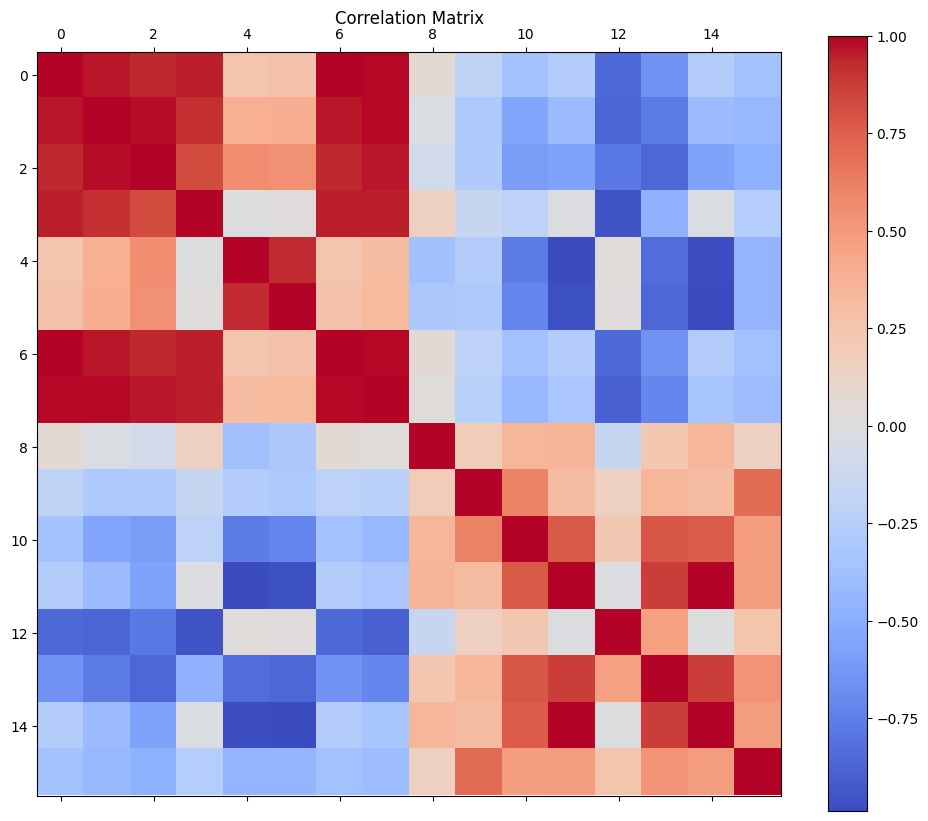

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plt.matshow(corr, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.show()

In [21]:
X_scal = scaler.fit_transform(X)
X_scal_df = pd.DataFrame(X_scal, columns=X.columns)
corr = X_scal_df.corr()
corr.style.background_gradient(cmap='coolwarm')


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Load data
data = pd.read_excel('./DryBeanDataset/Dry_Bean_Dataset.xlsx')
data_h2o = h2o.H2OFrame(data)

# Split data into features and target
X = data_h2o.columns
y = 'Class'
X.remove(y)

# Split data into training and test sets
train, test = data_h2o.split_frame(ratios=[.8])

# Initialize H2O AutoML
aml = H2OAutoML(max_models=20, seed=42)

# Train the model
aml.train(x=X, y=y, training_frame=train)

# Evaluate the model
lb = aml.leaderboard
print(lb)
